In [ ]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras import layers
from functools import partial

AUTO = tf.data.experimental.AUTOTUNE
import warnings
warnings.filterwarnings('ignore')

In [2]:
images = glob('/content/train_cancer/*/*.jpg')
len(images)

270

In [7]:
images = [path.replace('\\','/') for path in images]
df = pd.DataFrame({'filepath': images})
df['label'] = df['filepath'].str.split('/', expand=True)[3]
df.head()

,filepath,label
0,/content/train_cancer/benign/21.jpg,benign
1,/content/train_cancer/benign/6.jpg,benign
2,/content/train_cancer/benign/20.jpg,benign
3,/content/train_cancer/benign/28.jpg,benign
4,/content/train_cancer/benign/35.jpg,benign


In [9]:
# Let's label the target classes
df['label_bin'] = df['label'].map({'malignant':1, 'benign':0})

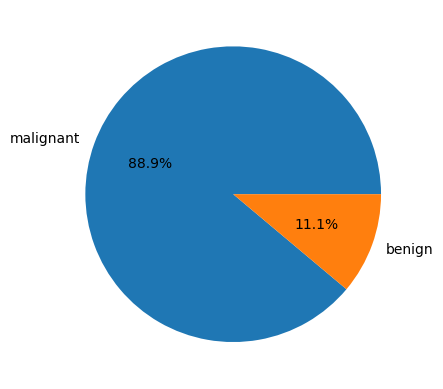

In [12]:
x = df['label'].value_counts()
plt.pie(x.values, labels=x.index, autopct='%1.1f%%')
plt.show()

It is heavily imbalanced.

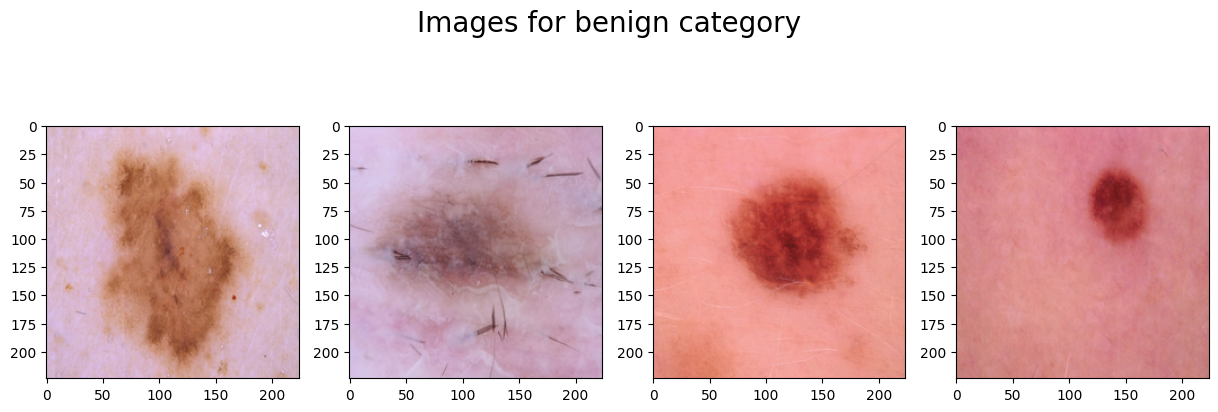

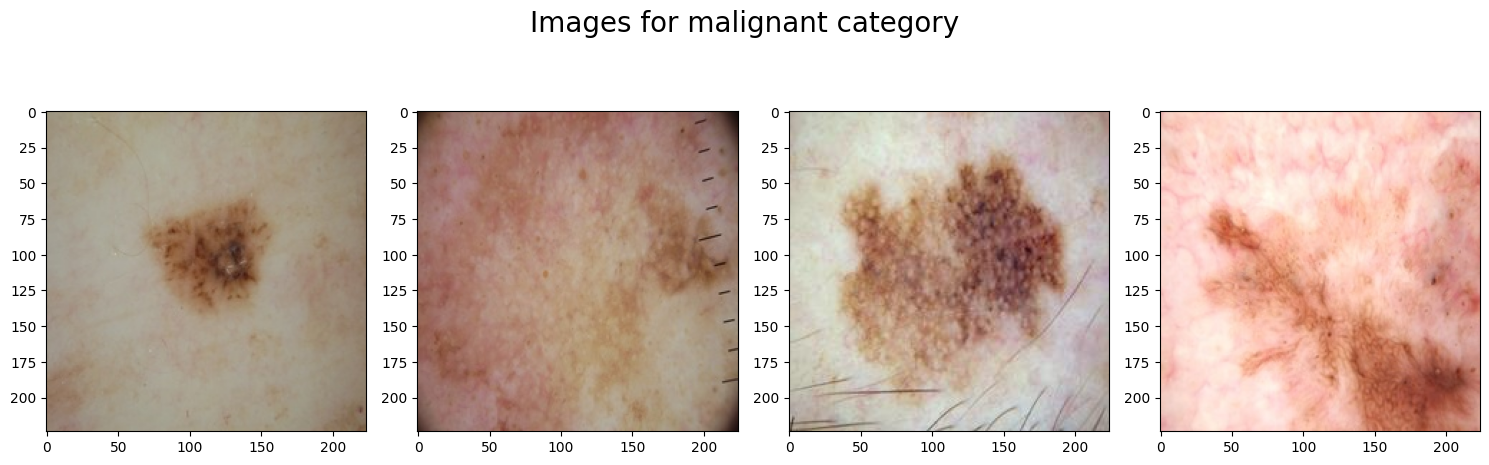

In [14]:
# Let's get the sample images

for cat in df['label'].unique():
    temp = df[df['label'] == cat]

    index_list = temp.index
    fig, ax = plt.subplots(1, 4, figsize=(15, 5))
    fig.suptitle(f'Images for {cat} category', fontsize=20)

    for i in range(4):
        index = np.random.randint(0, len(index_list))
        index = index_list[index]
        data = df.iloc[index]

        image_path = data[0]

        img = np.array(Image.open(image_path))
        ax[i].imshow(img)
plt.tight_layout()
plt.show()

In [ ]:
x = df['filepath']
y = df['label_bin']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

